In [1]:
import keras 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

#### Tworzenie katalogów oraz zbiorów: treningowych, testowych, validacyjnych 

In [2]:
directory_train = "train_data"
directory_val = "vaildation_data"
directory_test = "test_data"

In [3]:
dirs = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data"

In [6]:
# tworzenie katalogów train, vali, test
path_1 = os.path.join(dirs, directory_train)
os.mkdir(path_1)
path_2 = os.path.join(dirs, directory_val)
os.mkdir(path_2)
path_3 = os.path.join(dirs, directory_test)
os.mkdir(path_3)

In [7]:
list_dir = ["0","A","B","C"]

In [8]:
## tworzenie podkatalogów z nazwami klasy 
for link, folders, files in os.walk(dirs):
    for folder in folders:
        if folder.endswith("data"):
            name_path = os.path.join(link, folder)
            for i in list_dir:
                path = os.path.join(name_path, i)
                os.mkdir(path)                               

In [9]:
import shutil

In [13]:
## kopiowanie obrazów do odpowiednich podkatalogów (80%- train, 10%-vali, 10%-test)
# 300 * 0,8 = 240 train_set
# 30 - vali_set
# 30 - test_set
for i in range(240):    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/0/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/train_data/0"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/A/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/train_data/A"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/B/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/train_data/B"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/C/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/train_data/C"
    shutil.copy(src, des)

In [16]:
for i in range(240,270):
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/0/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/vaildation_data/0"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/A/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/vaildation_data/A"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/B/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/vaildation_data/B"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/C/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/vaildation_data/C"
    shutil.copy(src, des)

In [17]:
for i in range(270,300):
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/0/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/test_data/0"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/A/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/test_data/A"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/B/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/test_data/B"
    shutil.copy(src, des)
    
    src = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/C/"+str(i)+".jpg"
    des = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/test_data/C"
    shutil.copy(src, des)

In [18]:
#ścieżki do katalogów
train_dir = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/train_data"
vali_dir = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/vaildation_data"
test_dir = "C:/Users/mrgrz/OneDrive/Pulpit/zadanie/data/test_data"


#### augmentacja z pomocą funkcji w kerasie ImageDataGenerator, zbiór testowy musi zostać orginalny

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # skalowanie danych
    rotation_range =40, # losowy obrót obrazu w zakresie 0-180 st.
    width_shift_range=0.2, # wskzauje rozmiar ramy w której przekształca sie obraz, poziom
    height_shift_range=0.2, # wskzauje rozmiar ramy w której przekształca sie obraz, pion
    shear_range=0.2,# zakres losowego przycinania obrazu
    zoom_range=0.2,# zakres losowego przyblizania fragmentów obrazu
    horizontal_flip=True,# losowe odbicie połowy obrazu w poziomie
    fill_mode= 'nearest' # wypełnienie nowo powstałych pikseli, przez obród lub przesuniecie
)
test_datagen = ImageDataGenerator(rescale=1./255)

#### na postawie dnaych z geratora używam funcji która wyszykuje klasy i nadaje etykiety na podstawie katalogów

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # katalog do przeskalowania
    target_size=(150,150), #zmienia rozdzielczość obrazów 150x150
    batch_size=20, # rozmiar grupy wsadu
    class_mode='categorical' # problem klasyfikacji wieloklasowej (one hot encoder)
)

Found 960 images belonging to 4 classes.


In [21]:
validation_generator = test_datagen.flow_from_directory(
    vali_dir,
    target_size=(150,150), 
    batch_size=20,
    class_mode='categorical'
)

Found 120 images belonging to 4 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
    vali_dir, 
    target_size=(150,150), 
    batch_size=120,
    class_mode='categorical'
)

Found 120 images belonging to 4 classes.


In [23]:
for target, label in train_generator:
    print("kształt danych:",target.shape)
    print("kształt labelek:",label.shape)
    break

##generator zwaraca w nieskończoność wsady danych i ich etykiety dlatego trzeba używać "break"!

kształt danych: (20, 150, 150, 3)
kształt labelek: (20, 4)


#### Układam sieć z danymi wejściowymi zgodymi z przetworzonymi przez generator 

In [24]:
from keras import Sequential
from keras import layers

In [25]:
# sieć zawiera warstwy konwolucyjne, wartswe flatten i jedną Gestą jak w poleceniu 
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # w celu zmniejszenia ovefitigu  
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [26]:
from keras import optimizers

In [27]:
## kompilowanie modelu, ustawianie: funkcji straty, learning reatu = 0.0001 i metryki jak w poleceniu
model.compile(loss="categorical_crossentropy",
             optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [28]:
history = model.fit(train_generator, epochs=70, validation_data=validation_generator)

model.save("alfatbet_braille_'a.h5")# zapisywanie modelu 

Epoch 1/70
48/48 [==============================] - 18s 361ms/step - loss: 1.1692 - acc: 0.4969 - val_loss: 0.8712 - val_acc: 0.5000
Epoch 2/70
48/48 [==============================] - 17s 361ms/step - loss: 0.7205 - acc: 0.7219 - val_loss: 0.7036 - val_acc: 0.5167
Epoch 3/70
48/48 [==============================] - 18s 363ms/step - loss: 0.5727 - acc: 0.7510 - val_loss: 0.5084 - val_acc: 0.9667
Epoch 4/70
48/48 [==============================] - 17s 352ms/step - loss: 0.4797 - acc: 0.8156 - val_loss: 0.4303 - val_acc: 0.9000
Epoch 5/70
48/48 [==============================] - 17s 355ms/step - loss: 0.4079 - acc: 0.8458 - val_loss: 0.3725 - val_acc: 0.8333
Epoch 6/70
48/48 [==============================] - 17s 346ms/step - loss: 0.3650 - acc: 0.8646 - val_loss: 0.3530 - val_acc: 0.8833
Epoch 7/70
48/48 [==============================] - 17s 351ms/step - loss: 0.3136 - acc: 0.8792 - val_loss: 0.4563 - val_acc: 0.7500
Epoch 8/70
48/48 [==============================] - 17s 348ms/step - 

In [31]:
import matplotlib.pyplot as plt

#### wizualizacja trenowania przy uwzględnieniu stary walidacji i dokładności walidacji 

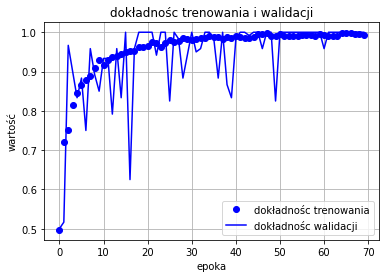

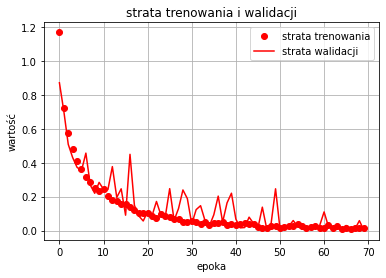

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = "dokładnośc trenowania")
plt.plot(epochs, val_acc, 'b', label = "dokładnośc walidacji")
plt.title("dokładnośc trenowania i walidacji")
plt.xlabel('epoka')
plt.ylabel('wartość')
plt.legend()
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'ro', label = "strata trenowania")
plt.plot(epochs, val_loss, 'r', label = "strata walidacji")
plt.title("strata trenowania i walidacji")
plt.xlabel('epoka')
plt.ylabel('wartość')
plt.legend()
plt.grid()

plt.show()

#### Mierzenie dokładności i sprawdzanie predykcji modelu 

In [33]:
import numpy as np
from keras import metrics

In [50]:
evaluate = model.evaluate(test_generator)
print("dokładność modelu na zbiorze testowym:", evaluate)

1/1 [==============================] - 1s 635ms/step - loss: 0.0035 - acc: 1.0000
dokładność modelu na zbiorze testowym: [0.0034749945625662804, 1.0]


In [115]:
# klasy z odpowiednimi labelkami 
class_img = test_generator.class_indices
class_img

{'0': 0, 'A': 1, 'B': 2, 'C': 3}

[0. 0. 1. 0.]


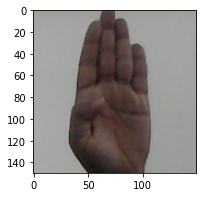

[0. 1. 0. 0.]


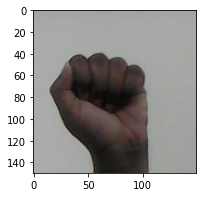

[0. 0. 0. 1.]


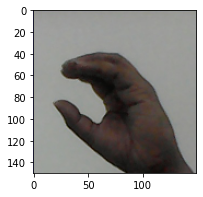

[0. 0. 1. 0.]


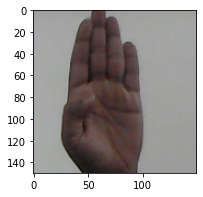

[0. 1. 0. 0.]


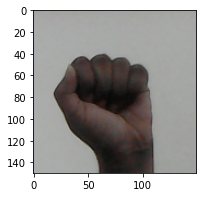

[0. 0. 1. 0.]


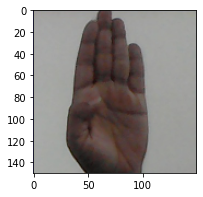

[1. 0. 0. 0.]


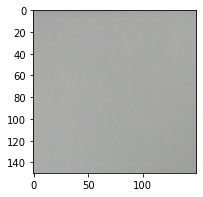

[1. 0. 0. 0.]


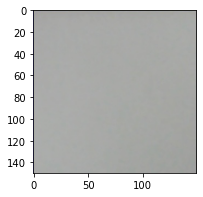

[0. 0. 1. 0.]


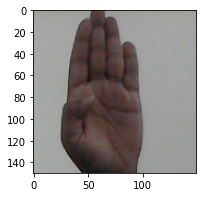

In [119]:
## wyświetlanie obrazów i labelek w formie One Hot Encoder 
for kn in range(9):
    plt.figure(figsize=(3,3))
    target, label = test_generator.next()
    print(label[0]) 
    plt.imshow(target[0])
    plt.show()

1/1 [==============================] - 1s 660ms/step
etykieta: [0. 0. 0. 1.]
predykcja etykiety: 3
obraz:


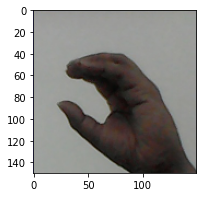

etykieta: [0. 0. 1. 0.]
predykcja etykiety: 2
obraz:


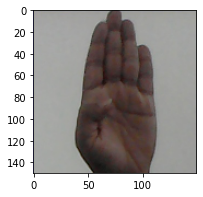

etykieta: [1. 0. 0. 0.]
predykcja etykiety: 0
obraz:


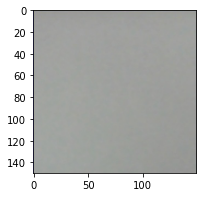

etykieta: [1. 0. 0. 0.]
predykcja etykiety: 0
obraz:


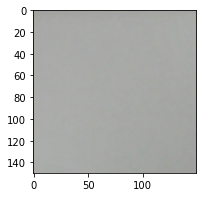

etykieta: [0. 0. 0. 1.]
predykcja etykiety: 3
obraz:


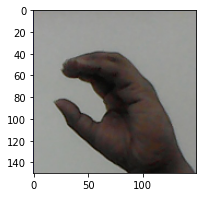

etykieta: [0. 0. 1. 0.]
predykcja etykiety: 2
obraz:


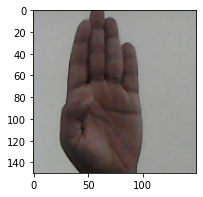

etykieta: [0. 0. 0. 1.]
predykcja etykiety: 3
obraz:


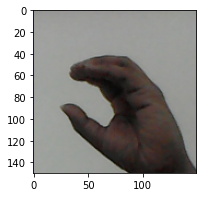

etykieta: [0. 1. 0. 0.]
predykcja etykiety: 1
obraz:


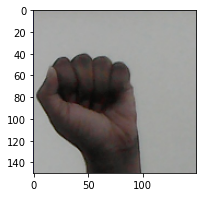

etykieta: [1. 0. 0. 0.]
predykcja etykiety: 0
obraz:


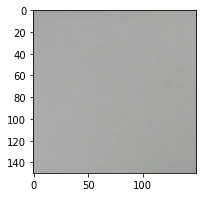

In [165]:
prediction_set = test_generator
obraz, etykieta = prediction_set.next()
# przewidywania modelu 
prediction = model.predict(prediction_set)
prediction = np.argmax(prediction, axis=1)
# przewidywanie pierwszych 10 klas

for i in range(9):
    plt.figure(figsize=(3,3))
    print("etykieta:", etykieta[i])
    print("predykcja etykiety:", prediction[i])
    print("obraz:")
    plt.imshow(obraz[i])
    plt.show()


In [167]:
# "przewiduje, że pierwszy przykład należy do klasy 3, drugi do 2 itd."
prediction[:10]

array([3, 2, 0, 0, 3, 2, 3, 1, 0, 2], dtype=int64)

In [ ]:
# test = np.argmax(prediction_set.labels) 
# #matrix = confusion_matrix(test_generator.labels, y_prediction , normalize='pred')
# prediction_ = model.predict(prediction_set, label_prediction)


In [153]:
from keras.utils import to_categorical

In [168]:
# precision i recall oczekują tych samych danych wejściowych 
# dlatego sprwadzam predykcje do One Hot Encoder
for target,label in prediction_set:
    to_predict_label = np.array(label)
    break
category = to_categorical(prediction,num_classes=4)
precision = keras.metrics.Precision()
precision.update_state(to_predict_label, category)
precision = precision.result().numpy()
print("precyzja (precision):",precision)

recall = keras.metrics.Recall()
recall.update_state(to_predict_label, category)
recall = recall.result().numpy()
print("czułość (recall):",recall)

precyzja (precision): 0.25833333
czułość (recall): 0.25833333


In [169]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.2583333352560639

In [301]:
# źródła: 
# Ksiązka Uczenie maszynowe z użyciem Scikit-Learn i TnesorFlow (Aurelien Geron) 
# Ksiażka Deep Learnig praca z biblioteką Keras (Francois Chollet)
# Dokumentacja TensorFlow i Keras 
# Czasami Stackoverflow (best friend  <3)